In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 10000
t1 = np.linspace(0, 10, N)    #Giga seconds
dt1 = t1[1] - t1[0]             #Giga seconds
dt1 = dt1*10**9               #converting to s

In [2]:
G = 6.67408 * 10**-11  # m^3 kg^-1 s^-2

# Integration Function

In [3]:
def Grav_leapfrog(M, x0, y0, vx0, vy0, dt):  # x0 y0 in parsecs ; vx0 vy0 in km/s ; M in kg ; dt in s
    ##################################################################################
    # arrays are allocated and filled with zeros 
    x = np.zeros(N)
    y = np.zeros(N)
    r = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    E = np.zeros(N)
    
    ##################################################################################
    # set time steps and constants of conversion
    step = dt
    step2 = dt/2
    
    pc_m = 3.086 * 10**16
    kms_ms = 1000
    
    ##################################################################################
    # initial conditions
    x[0] = x0 * pc_m              #converting pc to m
    y[0] = y0 * pc_m              #converting pc to m
    vx[0] = vx0 * kms_ms          #converting km/s to m/s
    vy[0] = vy0 * kms_ms          #converting km/s to m/s
    
    r[0] = (x[0]**2 + y[0]**2)**0.5
    vx[1] = vx[0] - G*M*step2*x[0]/(r[0]**3)
    vy[1] = vy[0] - G*M*step2*y[0]/(r[0]**3)
    ##################################################################################
    # integration
    for i in range(0, N-2):
        x[i+1] = x[i] + step*vx[i+1]
        y[i+1] = y[i] + step*vy[i+1]
        r[i+1] = (x[i+1]**2 + y[i+1]**2)**0.5
        vx[i+2] = vx[i+1] - G*M*step*x[i+1]/(r[i+1]**3)
        vy[i+2] = vy[i+1] - G*M*step*y[i+1]/(r[i+1]**3)
        E[i] = 0.5*(vx[i]**2 + vy[i]**2) - G*M/r[i]     # in (m^2)/(s^2)

    x[N-1] = x[N-2] + step*vx[N-1] 
    y[N-1] = y[N-2] + step*vx[N-1]
    r[N-1] = (x[N-1]**2 + y[N-1]**2)**0.5
    E[N-1] = 0.5*(vx[N-1]**2 + vy[N-1]**2) - G*M/r[N-1]
    
    x = x / pc_m                  #converting back to pc
    y = y / pc_m                  #converting back to pc
    vx = vx / kms_ms              #converting back to km/s
    vy = vy / kms_ms              #converting back to km/s
    
    ##################################################################################
    # return solution
    return x,y,vx,vy,E

# Earth-Sun System

In [4]:

M = 1.989 * 10**30              #kg
x0 = 0.00000484814271           #1 AU in pc
y0 = 0                          #pc
vx0 = 0                         #km/s
vy0 = 30                        #km/s

x,y,vx,vy,E = Grav_leapfrog(M, x0, y0, vx0, vy0, dt1)

In [5]:
R1 = (x**2 + y**2)**0.5

Text(0,0.5,'$Y (pc)$')

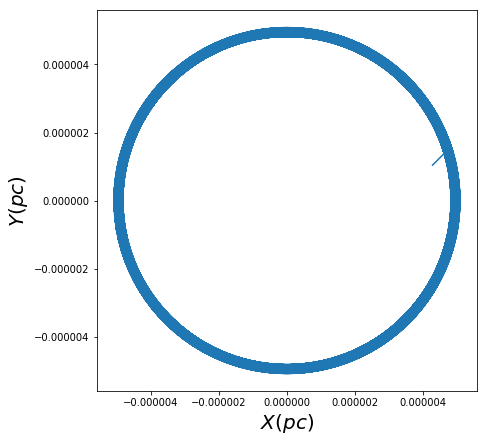

In [6]:
plt.figure(figsize=(7,7))
plt.plot(x,y)
plt.gca().set_aspect("equal",adjustable="box")
plt.xlabel("$X (pc)$", fontsize=20)
plt.ylabel("$Y (pc)$", fontsize=20)

Text(0,0.5,'$Energy (m^2/s^2)$')

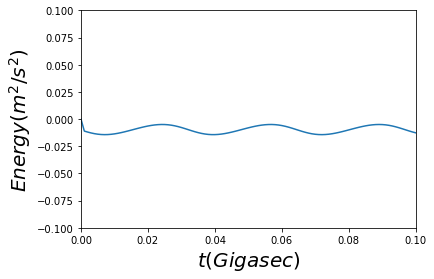

In [7]:
plt.plot(t1,(E-E[0])/E[0])
plt.ylim(-0.1,0.1)
plt.xlim(0,0.1)
plt.xlabel("$t (Giga sec)$", fontsize=20)
plt.ylabel("$Energy (m^2/s^2)$", fontsize=20)

# Sun-MilkyWay System

In [8]:
## Assuming Milky Way has a mass of 10^11 Solar Masses.

M2 = 1.989 * 10**41
x02 = 8000
y02 = 0
vx02 = 0
vy02 = 220

t2 = np.linspace(0, 1, N)     #Giga years
dt2 = t2[1] - t2[0]           #Giga years
dt2 = dt2*3.1536*10**16       #converting to s 

x2,y2,vx2,vy2,E2 = Grav_leapfrog(M2, x02, y02, vx02, vy02, dt2)

In [9]:
print(x)

[4.84814271e-06 4.75203804e-06 4.46780568e-06 ... 4.87796136e-06
 4.66961626e-06 4.28016905e-06]


In [10]:
R2 = (x2**2 + y2**2)**0.5

Text(0,0.5,'$Y (pc)$')

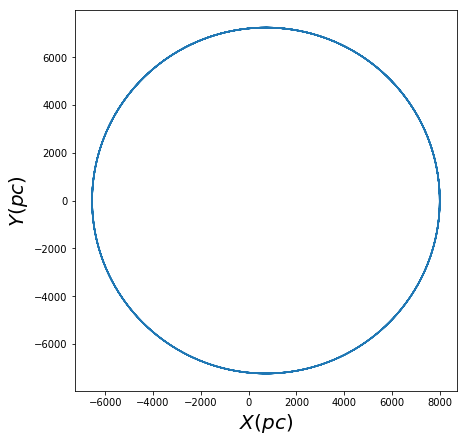

In [11]:
plt.figure(figsize=(7,7))
plt.plot(x2,y2)
plt.gca().set_aspect("equal",adjustable="box")
plt.xlabel("$X (pc)$", fontsize=20)
plt.ylabel("$Y (pc)$", fontsize=20)

Text(0,0.5,'$Energy (m^2/s^2)$')

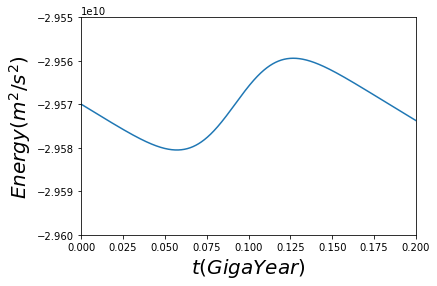

In [12]:
plt.plot(t2, E2)
plt.ylim(-2.96e10,-2.955e10)
plt.xlim(0,0.2)
plt.xlabel("$t (Giga Year)$", fontsize=20)
plt.ylabel("$Energy (m^2/s^2)$", fontsize=20)

# Marchetti-Subset First data point

In [13]:
## Trying first Marchetti data with my very simple Milky way potential

x03 = -8452.358048471222
y03 = 13.403150258349427
vx03 = -29.801108944585184
vy03 = 271.0914685479444

N3 = 10000
t3 = np.linspace(0,10,N)
dt3 = t3[1] - t3[0]
dt3 = dt3*3.1536*10**16 

x3,y3,vx3,vy3,E3 = Grav_leapfrog(M2, x03, y03, vx03, vy03, dt3)


Text(0,0.5,'$Y (pc)$')

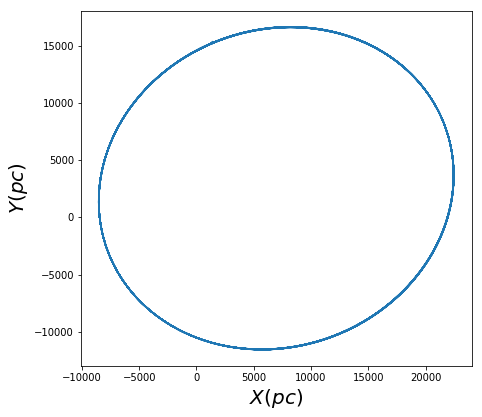

In [14]:
plt.figure(figsize=(7,7))
plt.plot(x3,y3)
plt.gca().set_aspect("equal",adjustable="box")
plt.xlabel("$X (pc)$", fontsize=20)
plt.ylabel("$Y (pc)$", fontsize=20)

Text(0,0.5,'$Energy (m^2/s^2)$')

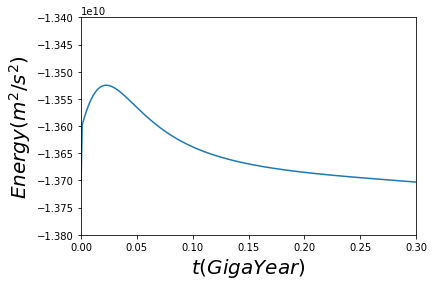

In [15]:
plt.plot(t3,E3)
plt.xlim(0,0.3)
plt.ylim(-0.138e11,-0.134e11)
plt.xlabel("$t (Giga Year)$", fontsize=20)
plt.ylabel("$Energy (m^2/s^2)$", fontsize=20)